In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Defining train and test

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')

In [ ]:
train.columns

Index(['x', 'y'], dtype='object')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


Removing null values

In [ ]:
imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer.fit(train)
train = pd.DataFrame(imputer.transform(train),columns=('x','y'))

In [ ]:
X_train = train.iloc[:,0:1].values
y_train = train.iloc[:,-1].values
X_test = test.iloc[:,0:1].values
y_test = test.iloc[:,-1].values

Generate regressor and fit the data

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

Plotting the training data

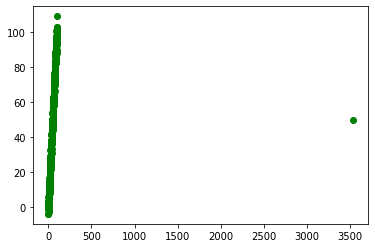

In [ ]:
predictions = regressor.predict(X_test)
plt.scatter(X_train, y_train,color='g') 

Plotting the testing data

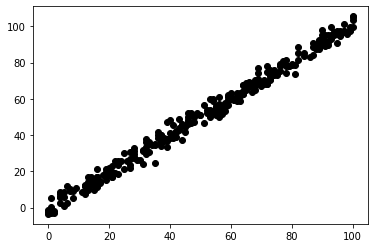

In [ ]:
plt.scatter(X_test, y_test, color='k')

In [ ]:
max_x = train['x'].max()
np.where( train['x'] == max_x)

(array([213]),)

Doing this, you will get some unexpected graphics!
Because there is a value too high and must be deleted

In [ ]:
# Hint: Run a loop to find the index of max value
train.iloc[[213]]     #we can see here that this point is the outlier in our data and the index is 213

,x,y
213,3530.157369,49.939869


Now we should delete the index of max value to make data more fit

In [ ]:
train.drop(213,axis=0,inplace=True) # fill the index
X_train = train.iloc[:,0:1].values
y_train = train.iloc[:,-1].values
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

Again,Plotting the training data

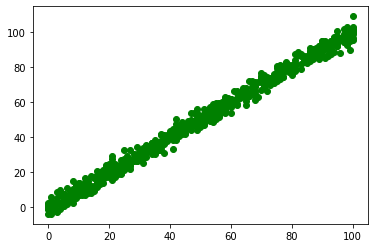

In [ ]:
plt.scatter(X_train, y_train,color='g') 

Again,Plotting the testing data

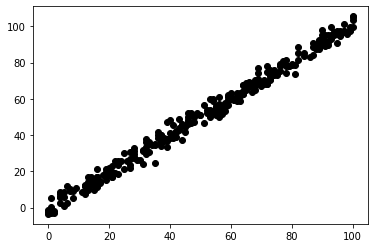

In [ ]:
plt.scatter(X_test, y_test, color='k')